# Project 44: Simulating the Izhikevich spiking neuron model usingthe Brian2 software

## Authors: Julen Etxaniz and Ibon Urbina

## Subject: Machine Learning and Neural Networks

## Date: 22/11/2020

## Objective: The goal of the project is to implement the Izhikevich’s model using the Brian2 Python library https://brian2.readthedocs.io/en/stable/.

## Contents
### 1. Importing the libraries
### 2. Defining the model
### 3. Interacting with the model
### 4. Neuron Types

# 1. Importing the libraries

In [1]:
%matplotlib inline
from brian2 import *
import ipywidgets as ipw

# 2. Defining the model

In [26]:
def model(a=0.02, b=0.2, c=-65, d=2, I=10, V=-65, tau=0.1, duration=20):
    # Parameters
    tau = tau*ms
    duration = duration*ms
    
    #Simulation
    eqs = '''
    dv/dt = (0.04*v**2+5*v+140-u+I)/tau : 1
    du/dt = (a*(b*v-u))/tau : 1
    '''
    G = NeuronGroup(1, eqs, threshold='v>=30', reset='v=c; u+=d', method='euler')
    G.v = V
    G.u = b*V
    
    statemon = StateMonitor(G, 'v', record=0)
    spikemon = SpikeMonitor(G)

    run(duration)
   
    #Plotting
    plot(statemon.t/ms, statemon.v[0], label='v')
    #for t in spikemon.t:
        #axvline(t/ms, ls='--', c='C1')
    axhline(30, ls='-', c='C1', lw=2, label='v=30')
    xlabel('Time (ms)')
    ylabel('v')
    legend()
    #print("Spike times: %s" % spikemon.t[:])

# 3. Interacting with the model

In [13]:
layout = ipw.Layout(width='100%')
style = {'description_width': 'initial'}
ipw.interact(model,
             a=ipw.FloatSlider(value=0.02, min=0.02, max=0.1, step=0.01, continuous_update=False,
                             description="a: time scale of the recovery variable u", style=style, layout=layout),
             b=ipw.FloatSlider(value=0.2, min=0.2, max=0.26, step=0.01, continuous_update=False,
                             description="b: sensitivity of the recovery variable u to the subthreshold fluctuations of the membrane potential v", style=style, layout=layout),
             c=ipw.IntSlider(value=-65, min=-65, max=-50, step=1, continuous_update=False,
                             description="c: after-spike reset value of the membrane potential v", style=style, layout=layout),
             d=ipw.FloatSlider(value=2, min=2, max=8, step=0.1, continuous_update=False,
                             description="d: after-spike reset of the recovery variable u", style=style, layout=layout),
             I=ipw.FloatSlider(value=10, min=1, max=20, step=1, continuous_update=False,
                             description="I: injected dc-current", style=style, layout=layout),
             V=ipw.FloatSlider(value=-65, min=-87, max=-50, step=1, continuous_update=False,
                             description="V: initial membrane potential v", style=style, layout=layout),
             tau=ipw.FloatSlider(value=0.1, min=0.1, max=1, step=0.01, continuous_update=False,
                             description="tau: time resolution", style=style, layout=layout),
             duration=ipw.IntSlider(value=20, min=1, max=100, step=1, continuous_update=False,
                             description="duration: length of the simulation", style=style, layout=layout),
             );

interactive(children=(FloatSlider(value=0.02, continuous_update=False, description='a: time scale of the recov…

# 4. Neuron Types
<img src="types.gif" alt="Types">

## 4.1. Excitatory

### 4.1.1. Regular Spiking (RS)

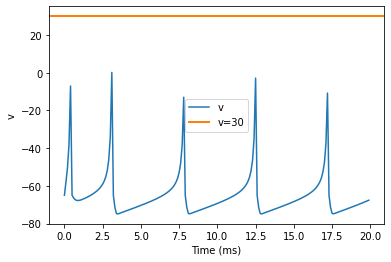

In [27]:
model(d=8)

### 4.1.2. Intrinsically Bursting (IB)

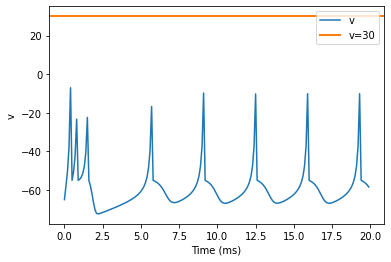

In [5]:
model(c=-55, d=4)

### 4.1.3. Chattering (CH)

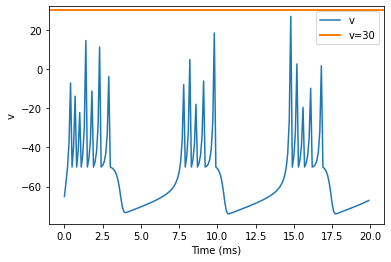

In [6]:
model(c=-50)

## 4.2. Inhibitory

### 4.2.1. Fast Spiking (FS)

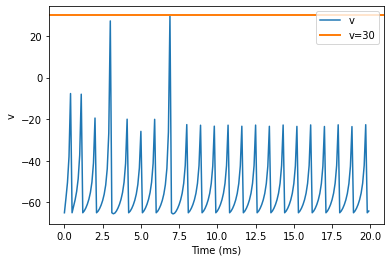

In [7]:
model(a=0.1)

### 4.2.2. Low-Thershold Spiking (LTS)

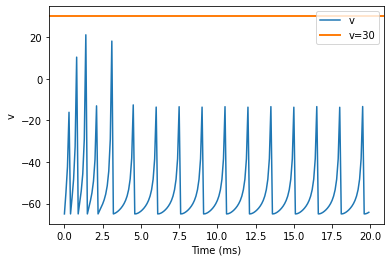

In [8]:
model(b=0.25)

## 4.3. Others

### 4.3.1 Thalamo-Cortical (TC)

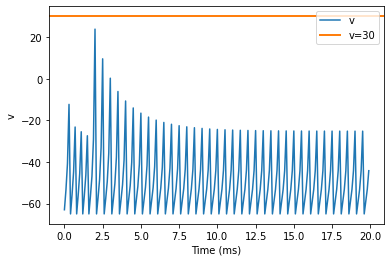

In [9]:
model(b=0.25, d=0.05, V=-63)

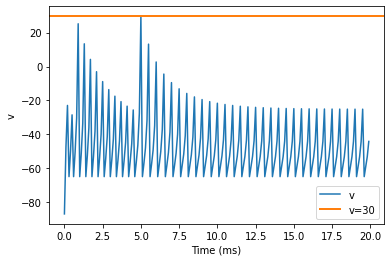

In [10]:
model(b=0.25, d=0.05, V=-87)

### 4.3.2 Resonator (RZ)

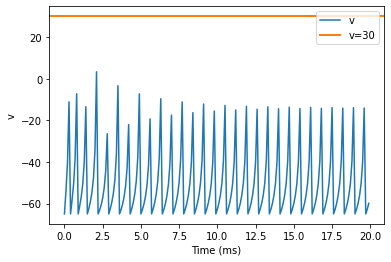

In [11]:
model(a=0.1, b=0.26)